In [47]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [40]:
df = pd.read_csv('dataset.csv')
df

,Flow id,Src IP,Dst IP,Dst port,Protocol,Application protocol,Duration,Received bytes,Received packets,Transmitted bytes,Transmitted packets,Total bytes,Total packets,label
0,6286023149652057364,10.127.0.80,8.8.8.8,53,udp,dns,79,336,2,2,125,461,4,Normal
1,8319139386785406223,10.127.0.80,104.237.62.211,443,tcp,http,102653,6977,13,11,1060,8037,24,malware
2,1919790348551596009,10.127.0.214,8.8.8.8,53,udp,dns,10,126,1,1,59,185,2,Normal
3,8302770608297594407,10.127.0.214,104.237.62.211,443,tcp,tls,4962,6831,12,11,859,7690,23,malware
4,-2525870453884057151,10.127.0.178,8.8.8.8,53,udp,dns,28,126,1,1,59,185,2,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
208993,8856169075910280688,10.127.0.142,193.56.146.218,80,tcp,http,114515,95210,77,45,2466,97676,122,malware
208994,5187146716418227615,10.127.0.196,94.142.138.182,80,tcp,http,116992,1552141,9040,16861,786410,2338551,25901,malware
208995,5353439611324290294,10.127.0.196,162.159.134.233,443,tcp,http,113907,6981,18,14,1218,8199,32,malware
208996,1662168985598881078,10.127.0.12,193.56.146.11,4173,tcp,-,12099,30630,522,1469,1997805,2028435,1991,malware


In [41]:
cols = ['Flow id', 'Dst port', 'Protocol']
df = df[cols]
df

,Flow id,Dst port,Protocol
0,6286023149652057364,53,udp
1,8319139386785406223,443,tcp
2,1919790348551596009,53,udp
3,8302770608297594407,443,tcp
4,-2525870453884057151,53,udp
...,...,...,...
208993,8856169075910280688,80,tcp
208994,5187146716418227615,80,tcp
208995,5353439611324290294,443,tcp
208996,1662168985598881078,4173,tcp


In [61]:
data = df.groupby(['Dst port']).agg({'Flow id': 'count'}).reset_index().sort_values("Flow id", ascending=False)
data = data[data['Dst port'] != 37215]
data

,Dst port,Flow id
3,80,124
6,443,70
15,8080,65
2,53,40
25,40500,27
14,7080,14
12,4173,10
10,4123,9
1,25,9
27,56999,6


<AxesSubplot: xlabel='Dst port', ylabel='Flow id'>

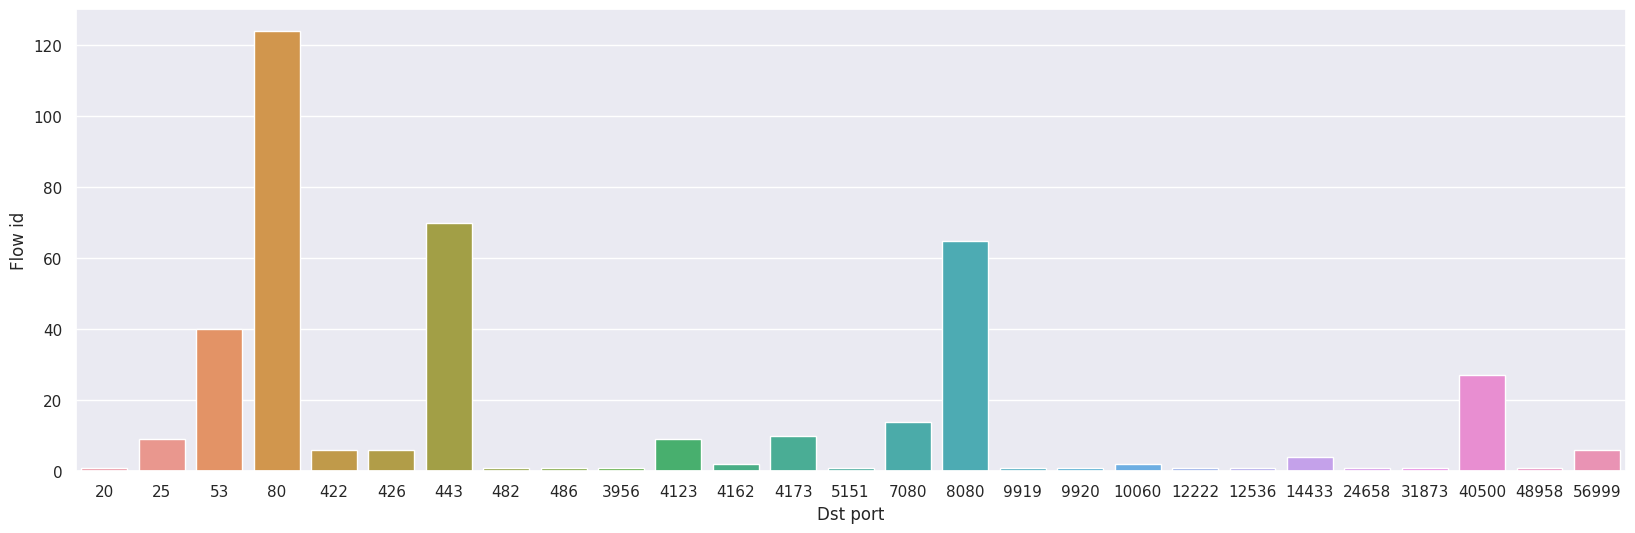

In [63]:
# setting the dimensions of the plot
fig, ax = plt.subplots(figsize=(20, 6))
#sns.catplot(data=data, x='Dst port', y='Flow id', kind='bar')
sns.barplot(data=data, x='Dst port', y='Flow id', ax=ax)

In [72]:
df2 = pd.read_csv('dataset.csv')
df2

,Flow id,Src IP,Dst IP,Dst port,Protocol,Application protocol,Duration,Received bytes,Received packets,Transmitted bytes,Transmitted packets,Total bytes,Total packets,label
0,6286023149652057364,10.127.0.80,8.8.8.8,53,udp,dns,79,336,2,2,125,461,4,Normal
1,8319139386785406223,10.127.0.80,104.237.62.211,443,tcp,http,102653,6977,13,11,1060,8037,24,malware
2,1919790348551596009,10.127.0.214,8.8.8.8,53,udp,dns,10,126,1,1,59,185,2,Normal
3,8302770608297594407,10.127.0.214,104.237.62.211,443,tcp,tls,4962,6831,12,11,859,7690,23,malware
4,-2525870453884057151,10.127.0.178,8.8.8.8,53,udp,dns,28,126,1,1,59,185,2,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
208993,8856169075910280688,10.127.0.142,193.56.146.218,80,tcp,http,114515,95210,77,45,2466,97676,122,malware
208994,5187146716418227615,10.127.0.196,94.142.138.182,80,tcp,http,116992,1552141,9040,16861,786410,2338551,25901,malware
208995,5353439611324290294,10.127.0.196,162.159.134.233,443,tcp,http,113907,6981,18,14,1218,8199,32,malware
208996,1662168985598881078,10.127.0.12,193.56.146.11,4173,tcp,-,12099,30630,522,1469,1997805,2028435,1991,malware


In [74]:
data2 = df2.groupby(['Application protocol']).agg({'Flow id': 'count'}).reset_index().sort_values("Flow id", ascending=False)
data2 = data2[data2['Application protocol'] != "-"]
data2

,Application protocol,Flow id
2,http,104
4,tls,89
1,dns,39
3,https,2


<AxesSubplot: xlabel='Application protocol', ylabel='Flow id'>

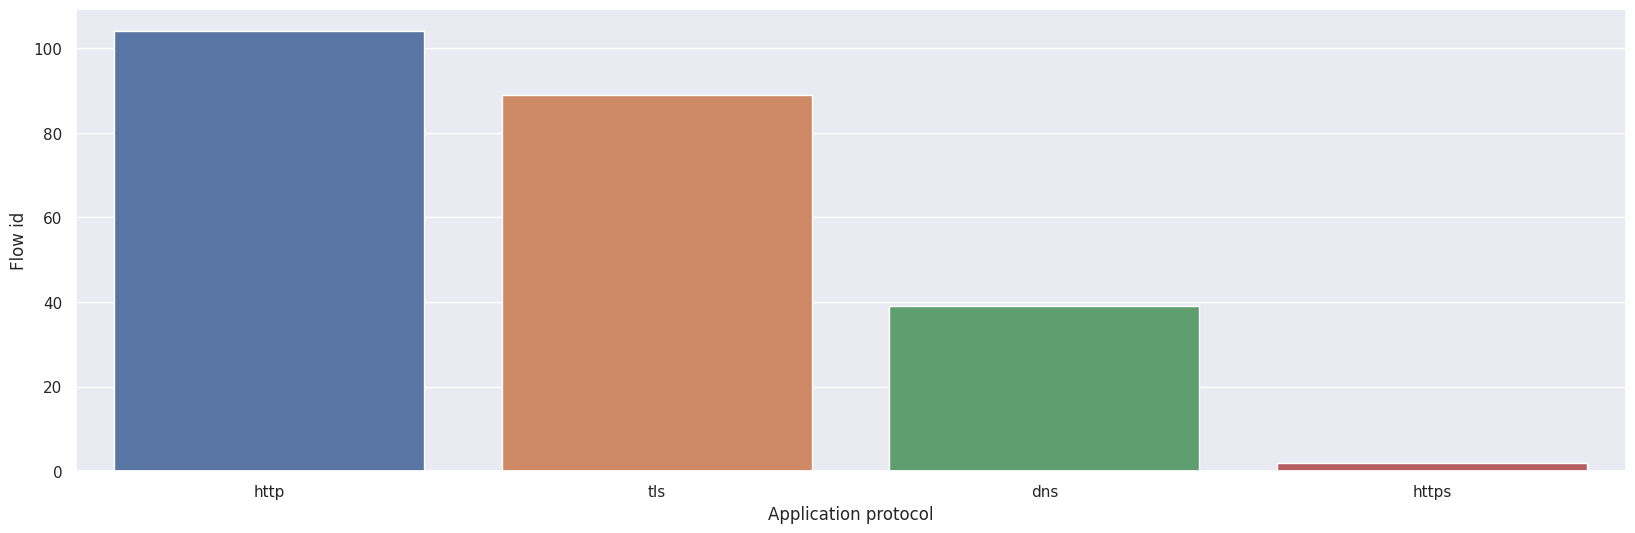

In [75]:
# setting the dimensions of the plot
fig, ax = plt.subplots(figsize=(20, 6))
#sns.catplot(data=data, x='Dst port', y='Flow id', kind='bar')
sns.barplot(data=data2, x='Application protocol', y='Flow id', ax=ax)